# AutoML - homework 2

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random
random.seed(420)

## Loading the data

In [ ]:
url = 'https://raw.githubusercontent.com/kozaka93/2023Z-AutoML/main/homeworks/homework2/artificial_test.data'
df_test = pd.read_csv(url, header=None, sep =' ')
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,483,454,513,495,523,469,453,477,506,479,...,480,543,259,413,520,485,498,523,510,NaN
1,485,508,493,487,478,472,504,476,479,475,...,480,535,534,514,452,484,495,548,477,NaN
2,483,521,507,475,493,486,421,475,496,483,...,476,498,495,508,528,486,465,508,503,NaN
3,474,504,576,480,553,483,524,478,483,483,...,475,470,463,509,525,479,467,552,517,NaN
4,495,474,523,479,495,488,485,476,497,478,...,471,522,343,509,520,475,493,506,491,NaN


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Columns: 501 entries, 0 to 500
dtypes: float64(1), int64(500)
memory usage: 2.3 MB


In [ ]:
df_test = df_test.dropna(how='all', axis=1)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,483,454,513,495,523,469,453,477,506,479,...,455,480,543,259,413,520,485,498,523,510
1,485,508,493,487,478,472,504,476,479,475,...,486,480,535,534,514,452,484,495,548,477
2,483,521,507,475,493,486,421,475,496,483,...,491,476,498,495,508,528,486,465,508,503
3,474,504,576,480,553,483,524,478,483,483,...,521,475,470,463,509,525,479,467,552,517
4,495,474,523,479,495,488,485,476,497,478,...,510,471,522,343,509,520,475,493,506,491


In [ ]:
url = 'https://raw.githubusercontent.com/kozaka93/2023Z-AutoML/main/homeworks/homework2/artificial_train.data'
X_train = pd.read_csv(url, header=None, sep =' ')
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,485,477,537,479,452,471,491,476,475,473,...,481,477,485,511,485,481,479,475,496,NaN
1,483,458,460,487,587,475,526,479,485,469,...,478,487,338,513,486,483,492,510,517,NaN
2,487,542,499,468,448,471,442,478,480,477,...,481,492,650,506,501,480,489,499,498,NaN
3,480,491,510,485,495,472,417,474,502,476,...,480,474,572,454,469,475,482,494,461,NaN
4,484,502,528,489,466,481,402,478,487,468,...,479,452,435,486,508,481,504,495,511,NaN


In [ ]:
X_train = X_train.dropna(how='all', axis=1)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,485,477,537,479,452,471,491,476,475,473,...,477,481,477,485,511,485,481,479,475,496
1,483,458,460,487,587,475,526,479,485,469,...,463,478,487,338,513,486,483,492,510,517
2,487,542,499,468,448,471,442,478,480,477,...,487,481,492,650,506,501,480,489,499,498
3,480,491,510,485,495,472,417,474,502,476,...,491,480,474,572,454,469,475,482,494,461
4,484,502,528,489,466,481,402,478,487,468,...,488,479,452,435,486,508,481,504,495,511


In [ ]:
url = 'https://raw.githubusercontent.com/kozaka93/2023Z-AutoML/main/homeworks/homework2/artificial_train.labels'
y_train = pd.read_csv(url, header=None)
y_train

,0
0,-1
1,-1
2,-1
3,1
4,1
...,...
1995,1
1996,-1
1997,-1
1998,1


## EDA

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 500 entries, 0 to 499
dtypes: int64(500)
memory usage: 7.6 MB


In [ ]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,481.722500,483.452500,510.166000,483.384500,501.612500,479.259000,480.109500,476.565000,486.793500,478.78900,...,482.458500,478.811500,486.356500,496.565500,493.49950,510.893000,478.219500,483.309000,507.977000,490.266000
std,6.421769,30.186294,38.899165,9.059895,41.389418,6.795956,40.575925,1.384461,15.043836,7.19092,...,20.890033,4.011735,23.967366,127.635442,34.81902,37.459353,5.880613,13.559847,37.224297,25.825273
min,462.000000,381.000000,370.000000,453.000000,371.000000,459.000000,334.000000,471.000000,430.000000,455.00000,...,407.000000,463.000000,391.000000,130.000000,368.00000,398.000000,457.000000,435.000000,363.000000,403.000000
25%,477.000000,464.000000,485.000000,477.000000,475.000000,475.000000,452.750000,476.000000,477.000000,474.00000,...,468.000000,476.000000,471.000000,404.000000,470.00000,486.000000,474.000000,474.000000,482.000000,473.000000
50%,482.000000,483.000000,510.500000,483.000000,500.000000,479.000000,480.000000,477.000000,487.000000,479.00000,...,482.000000,479.000000,486.000000,504.000000,492.00000,511.000000,478.000000,483.000000,508.000000,490.000000
75%,486.000000,503.000000,536.000000,490.000000,528.000000,484.000000,506.250000,477.000000,496.250000,484.00000,...,496.000000,481.000000,502.000000,586.000000,517.00000,535.000000,482.000000,492.000000,533.000000,507.250000
max,503.000000,600.000000,654.000000,519.000000,688.000000,505.000000,611.000000,481.000000,536.000000,503.00000,...,549.000000,497.000000,566.000000,920.000000,615.00000,661.000000,500.000000,535.000000,644.000000,583.000000


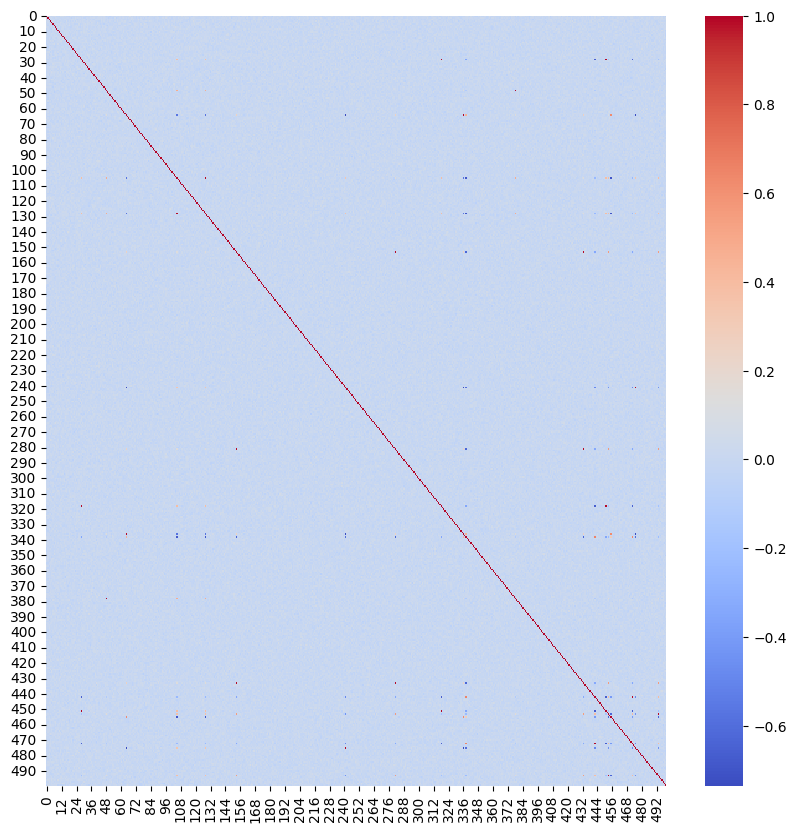

In [ ]:
correletions = X_train.corr()


plt.figure(figsize=(10,10))
ax = sns.heatmap(correletions, annot=False, cmap='coolwarm')

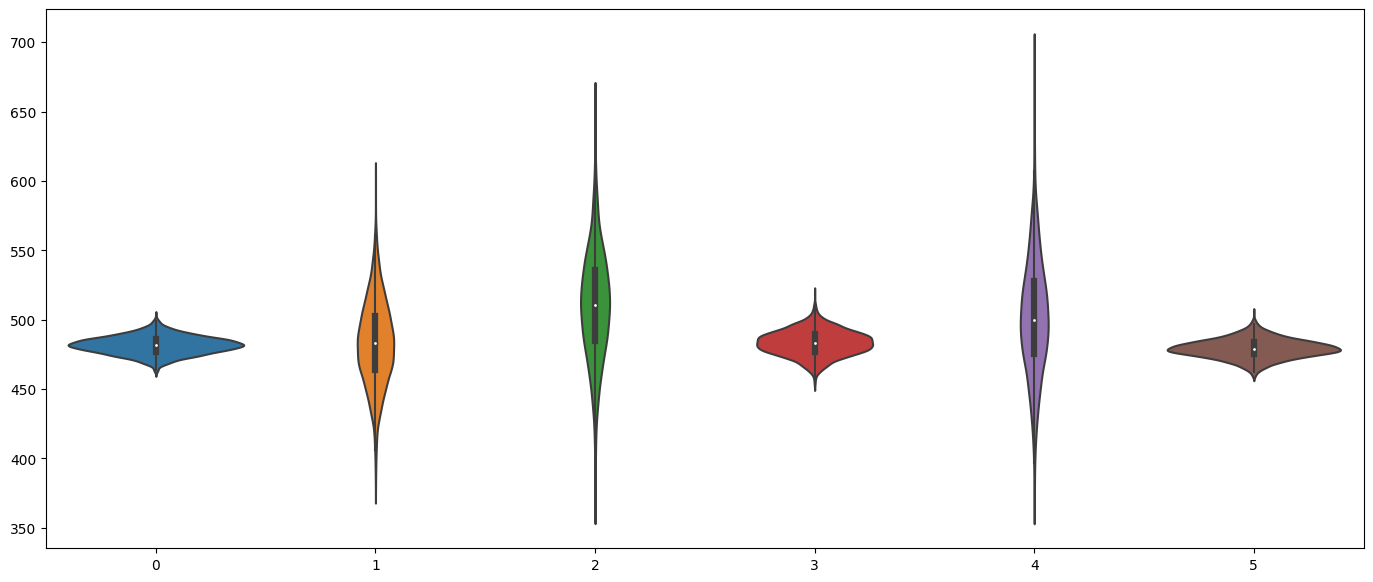

In [ ]:
plt.figure(figsize=(17,7))

ax = sns.violinplot(X_train.iloc[:,:6])

## Our own model

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
y_train2 = LabelEncoder().fit_transform(y_train)
y_train2

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
clf = RandomForestClassifier(random_state=123)
clf.fit(X_train, y_train2)
clf.score(X_train, y_train2)

1.0

In [ ]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

`{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}`

In [ ]:
from scipy.stats import uniform, randint


grid_params_rs = [{
    'bootstrap': [True, False],   # replace
    'max_features': uniform(0.01, 1),   # mtry
    'min_samples_split': uniform(0.01, 1),  # min.node.size
    'n_estimators': randint(1, 2001),   # num.trees
}]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

results_rs = pd.DataFrame()
grid = RandomizedSearchCV(clf,grid_params_rs, scoring='balanced_accuracy', random_state=37, n_iter=50)

In [ ]:
grid.fit(X_train, y_train2)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=123),
                   n_iter=50,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_features': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a2926c026b0>,
                                         'min_samples_split': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a2926d5e1d0>,
                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a2926d5f130>}],
                   random_state=37, scoring='roc_auc')

In [ ]:
results_rs["params"] = grid.cv_results_["params"]
results_rs["a_scores"] = grid.cv_results_["mean_test_score"]

## Zapis danych

In [ ]:
results_rs.to_csv("rf_results_rs.csv",index=False)